Is adult reproductive health affected by drug and/or alcohol use?

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


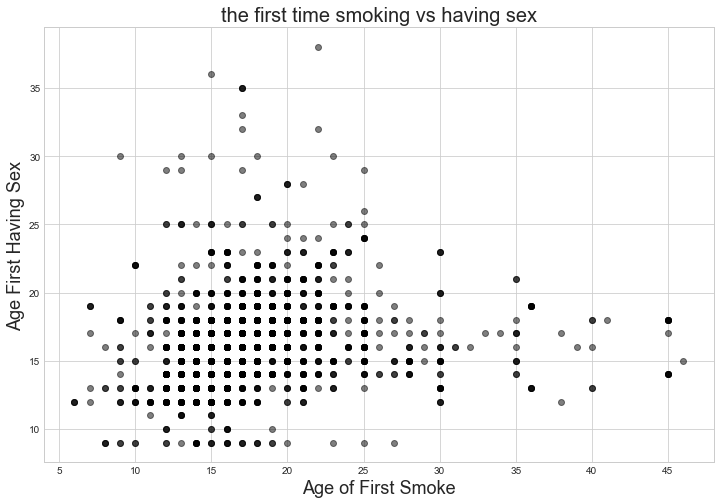

In [1]:
# import necessary data computation programs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# aesthetic choice for graph
plt.style.use('seaborn-whitegrid')
# download dataframe into notebook
df = pd.read_csv('Downloads/NHANES.csv')
#name dataframes
smoke = df['SmokeAge']
sex = df['SexAge']
# set x and y values to be used in data visual
x_value = smoke
y_value = sex
#make a scatteplot
fig, axs = plt.subplots(figsize=(12,8)) #size of visual
colors = (0,0,0) #sets colors
plt.scatter(x_value, y_value, c=colors, alpha=0.5) #actual plot code
plt.title('the first time smoking vs having sex', fontsize=20) # set title and its size
plt.xlabel('Age of First Smoke', fontsize=18) # set x label and its size
plt.ylabel('Age First Having Sex', fontsize=18) # set y label and its size
plt.show() # show the plot in notebook

In [2]:
# summarize data for first Smoke Age and Sex Age by finding 
# mean, standard deviation, and variance from numpy
print('smoke: mean=%.3f stdv=%.3f variance=%.3f' % (np.mean(smoke), np.std(smoke), np.var(smoke)))
print('sex: mean=%.3f stdv=%.3f variance=%.3f' % (np.mean(sex), np.std(sex), np.var(sex)))

smoke: mean=17.827 stdv=5.326 variance=28.364
sex: mean=17.429 stdv=3.716 variance=13.810


In [3]:
# drop NaNs from HardDrugs and nPregncies and then print the table of data
data = df[['HardDrugs', 'nPregncies']]
data = data.dropna()
data

,HardDrugs,nPregncies
4,Yes,2.0
7,No,1.0
8,No,1.0
9,No,1.0
20,No,4.0
...,...,...
9982,No,1.0
9986,No,2.0
9987,No,2.0
9991,No,2.0


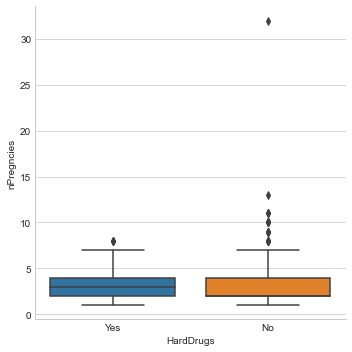

In [4]:
# import necessary program and then plot a boxplot for x="HardDrugs" and y="nPregncies"
import seaborn as sns
sns.catplot(x="HardDrugs", y="nPregncies", kind="box", data=df[['HardDrugs', 'nPregncies']])

In [5]:
# define the function so that 1 or more pregnancies counts toward a yes and otherwise it counts as a no 
def function(row):
    if row['nPregncies'] >= 1:
        return 'Yes'
    else:
        return 'No'
# make the table with rows as pregnancy and columns as hard drugs 
# the lack of a "no" row for pregnancy is most likely because the data did not have
# 0 for pregnancies and just left the columns blank
data['Pregnancy'] = data.apply(function, axis=1)
table = pd.crosstab(index=data["Pregnancy"], columns=data["HardDrugs"]) 
table

HardDrugs,No,Yes
Pregnancy,,
Yes,1796,319


In [6]:
# import necessary program for chi squared test
from scipy import stats
# code for test and table
chi2, p, dof, expected = stats.chi2_contingency(table)
# print values of chi^2, p-value, degrees of freedom, and expected values (of the table as seen above)
print("chi2:", chi2)
print("p:", p)
print("dof:", dof)
print("expected:", expected)

chi2: 0.0
p: 1.0
dof: 0
expected: [[1796.  319.]]


In [7]:
# drop NaNs from HardDrugs and nPregncies and then print the table of data
data = df[['HardDrugs', 'nBabies']]
data = data.dropna()
data

,HardDrugs,nBabies
4,Yes,2.0
20,No,3.0
21,No,3.0
22,No,2.0
30,No,6.0
...,...,...
9982,No,0.0
9986,No,2.0
9987,No,2.0
9991,No,2.0


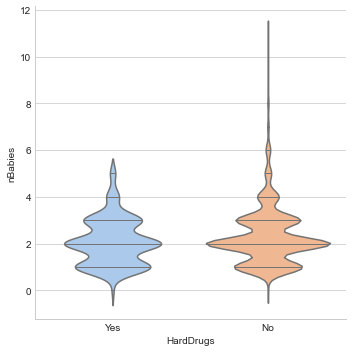

In [8]:
# the code for a violinplot from seaborn 
# which is basically a boxplot with kernel density estimation
sns.catplot(x="HardDrugs", y="nBabies", kind="violin", inner="stick", palette="pastel", data=df[['HardDrugs', 'nBabies']])

In [9]:
# define the function so that 1 or more babies counts toward a yes and otherwise it counts as a no 
def function(row):
    if row['nBabies'] >= 1:
        return 'Yes'
    else:
        return 'No'
# make the table with rows as babies and columns as hard drugs    
data['Babies'] = data.apply(function, axis=1)
table = pd.crosstab(index=data["Babies"], columns=data["HardDrugs"]) 
table

HardDrugs,No,Yes
Babies,,
No,3,2
Yes,1662,277


In [10]:
# code for test and table
chi2, p, dof, expected = stats.chi2_contingency(table)
# print values of chi^2, p-value, degrees of freedom, and expected values (of the table as seen above)
print("chi2:", chi2)
print("p:", p)
print("dof:", dof)
print("expected:", expected)

chi2: 0.9985928086498717
p: 0.3176512467158419
dof: 1
expected: [[4.28240741e+00 7.17592593e-01]
 [1.66071759e+03 2.78282407e+02]]


In [11]:
# define dataframes to be dependent on specific parameters
# e.g., yes or no for Hard Drug usage
drugs = df['HardDrugs'] == 'Yes'
nodrugs = df['HardDrugs'] == 'No'
# find the 95% confidence interval for the mean for hard drug usage (this code is the formula)
def CI_mean(data):
    se = np.std(data)/np.sqrt(len(data))
    low = np.mean(data)-1.96*se
    up = np.mean(data)+1.96*se
    print("Average is:", np.mean(data))
    print("95% CI of mean is: ({}, {})".format(low,up))

CI_mean(drugs)

Average is: 0.1065
95% CI of mean is: (0.10045386063342897, 0.11254613936657103)


In [12]:
# find the 95% confidence interval for the mean for hard drug usage (this code is the formula)
def CI_mean(data):
    se = np.std(data)/np.sqrt(len(data))
    low = np.mean(data)-1.96*se
    up = np.mean(data)+1.96*se
    print("Average is:", np.mean(data))
    print("95% CI of mean is: ({}, {})".format(low,up))

CI_mean(nodrugs)

Average is: 0.47
95% CI of mean is: (0.46021765590464125, 0.4797823440953587)


In [17]:
# find the 95% confidence interval for the mean difference between the number of 
# pregnancies and the number of babies (this code is the formula)
def CI_mean_diff(list1, list2):
    s1 = np.var(list1)
    s2 = np.var(list2)
    n1 = len(list1)
    n2 = len(list2)
    se2 = s1/n1 + s2/n2
    se = np.sqrt(se2)

    diff = np.mean(list1) - np.mean(list2)
    low = diff - 1.96 * se
    up = diff + 1.96 * se
    print("The average difference is:", diff)
    print("The 95% CI is: ({}, {})".format(low, up))
CI_mean_diff(df['nPregncies'], df['nBabies'])

The average difference is: 0.5699280780460017
The 95% CI is: (0.5263159027024412, 0.6135402533895621)
